In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%matplotlib inline

df = pd.read_csv('survey-results-public.csv')
schema = pd.read_csv('survey-results-schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Question 1:  What degree major is most common amongst professional developers?

Text(0.5, 0, '% of developers who studied each subject')

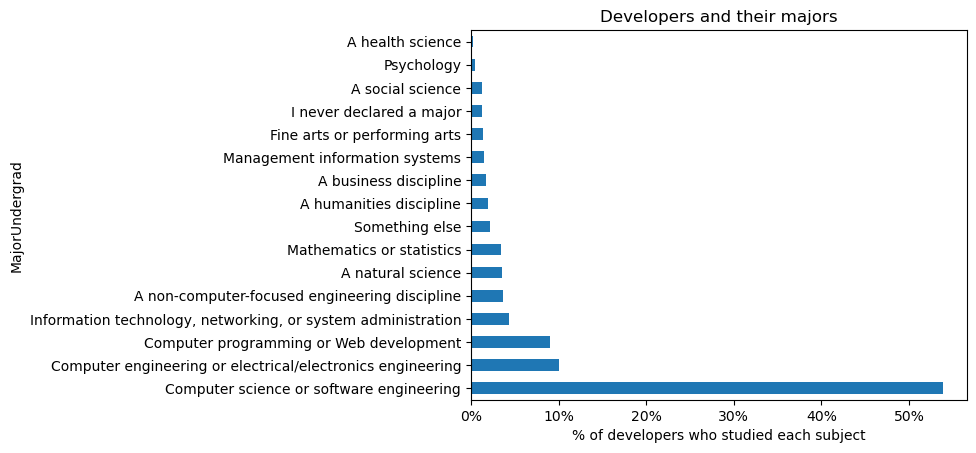

In [197]:
#Filter the data to select only those who are, or were, professional developers.
prodev_df = df[df['Professional'].isin(['Professional developer','Used to be a professional developer'])]

#Clean the data through the removal of rows which have no university major.
prodevuni_df = prodev_df[prodev_df['MajorUndergrad'].isnull()==False]

#Count the number of current and past developers who studied each major.
uni_vals = prodevuni_df['MajorUndergrad'].value_counts()

#Plot the percentage of current and past developers which studied each major.
(uni_vals/prodevuni_df.shape[0]).plot(kind="barh")
plt.title("Developers and their majors")
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('% of developers who studied each subject')

Question 2: Are those with higher job satisfaction typically those with higher salaries?

Text(0.5, 0, 'Job satisfaction rating')

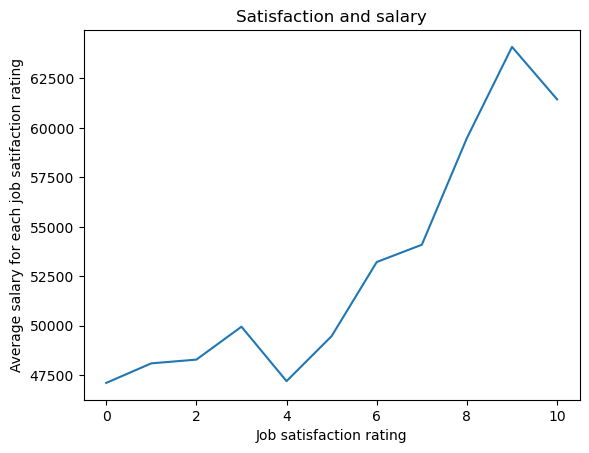

In [188]:
#Clean the data by removing NA values in the relevant columns.
satis_df = df.dropna(subset = ['JobSatisfaction','Salary'])

#Find the average salary for people who selected each level of job satisfaction.
satis = satis_df.groupby('JobSatisfaction')['Salary'].mean()

#Plot the findings.
plt.plot(satis.index, satis.values)
plt.title('Satisfaction and salary')
plt.ylabel('Average salary for each job satifaction rating')
plt.xlabel('Job satisfaction rating')

Question 3: Which company types are most likely to offer full-time remote work?

Text(0.5, 0, '% of workers at each company type which are fully remote')

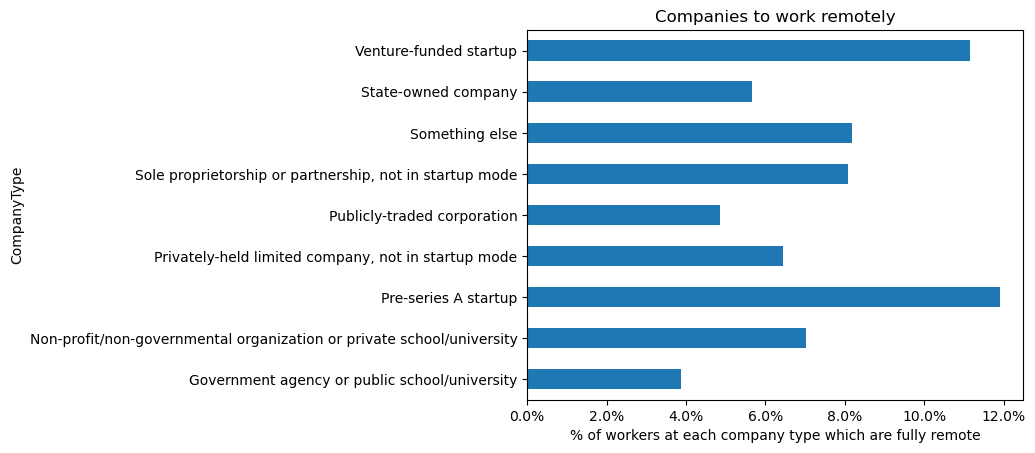

In [10]:
#Clean the data by removing rows with NA values in the relevant columns.
rem_df = df.dropna(subset = ['HomeRemote','CompanyType'])

#Remove the respondents who either didn't answer or didn't know with regards to their company type.
rem_df = rem_df[~rem_df['CompanyType'].isin(["I don't know", "I prefer not to answer"])]

#Find the propotion of employees at each company type which are fully remote. Graph this on a bar chart.
result = rem_df.groupby('CompanyType')['HomeRemote'].value_counts(normalize=True).loc[:,"All or almost all the time (I'm full-time remote)"]
result.plot(kind="barh")
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Companies to work remotely')
plt.xlabel('% of workers at each company type which are fully remote')